# Leverage cloud computing to enhance team work and accelerate mission science - A PODAAC perspective

### Jinbo Wang (Jinbo.Wang@jpl.nasa.gov), David Moroni, Tony Lee, Suresh Vannan, Mike Gangle, Ed Armstrong, John Klose, Catalina Oaida, Jack McNeils

### Jet Propulsion Laboratory, California Institute of Technology

March 30, 2022, ASAP-SWG workshop

# A brief introduction to PODAAC

1. DAAC: Distributed Active Archive Center
1. PODAAC is one of the 13 NASA DAACs
1. Disciplines: Ocean, Cyrosphere, Terrestrial dydrosphere, Air-Sea
1. Support missions: Seasat, TOPEX/Poseidon, Jason-1, NSCAT, SeaWinds on ADEOS-II, CYGNSS, GRACE/GRACE-FO, QuikSCAT, GHRSST, MEaSUREs, Aquarius, SPURS 1/2, ISS-RapidScat, OMG, /Sentinel-6 MF, ECCO, **COWVR/TEMPEST (2022)**, S-MODE EVS (2022), SWOT (2022)

## Moving data into Cloud

1. PO.DAAC will support new missions with big data
    * With new missions like Sentinel-6 Michael Freilich and Surface Water and Ocean Topography (SWOT) PO.DAAC needs to manage large data volumes (petabyte scale)
1. PO.DAAC will provide the same level of service and access to users 
     * Data search and download will be continue to be __free__ to all users
     * data-subscriber and data-downloader for conventional workflow. 
     * ```pip install podaac-data-subscriber```
     * https://github.com/podaac/data-subscriber
1. Direct in-cloud access 
     * Minimize the amount of data downloaded
     * Making the data more analysis ready 
     * Enable streamlined team collobration
     * Use jupyterlab (the platform for this demo)
1. By __June 2022, all PODAAC data will be in cloud__
    * Access to data via PO.DAAC Drive will shutdown in phases ⇒ Retirement complete by June 6, 2022


In [1]:
import utils
import pprint
import xarray as xr

In [2]:
s3=utils.direct_s3()
podaac_s3='podaac-ops-cumulus-protected'

## Check the number of existing collections in PODAAC CLOUD (AWS S3)

In [3]:
collections=s3.glob("podaac-ops-cumulus-protected/*")
print(len(collections), "total collections in PODAAC CLOUD (POCLOUD)")

395 total collections in PODAAC CLOUD (POCLOUD)


## Find existing relevant datasets

First show all datasets that are related to the keyword "Wind Vector" using ```utils.find_dataset(keywords=['Wind Vector'])```. 

The first column in the text shows the 'short_name', which is also the _folder_ name in the cloud storage (bucket in the AWS jargon). 

<div class="alert alert-block alert-warning">
Caveat: this utils.py module is not official PODAAC tool and subject to change in the future. 
</div>

In [6]:
wind_data=utils.find_dataset(keywords=['Wind Vector'])

ASCATB-L2-25km|MetOp-B ASCAT Level 2 25.0km Ocean Surface Wind Vectors in Full Orbit Swath|C2075141559-POCLOUD
ASCATC-L2-25km|MetOp-C ASCAT Level 2 25.0km Ocean Surface Wind Vectors in Full Orbit Swath|C2075141638-POCLOUD
ASCATB-L2-Coastal|MetOp-B ASCAT Level 2 Ocean Surface Wind Vectors Optimized for Coastal Ocean|C2075141605-POCLOUD
ASCATC-L2-Coastal|MetOp-C ASCAT Level 2 Ocean Surface Wind Vectors Optimized for Coastal Ocean|C2075141684-POCLOUD
ASCATA-L2-25km|MetOp-A ASCAT Level 2 25.0 km Ocean Surface Wind Vectors|C2075141524-POCLOUD
ASCATA-L2-Coastal|MetOp-A ASCAT Level 2 Ocean Surface Wind Vectors Optimized for Coastal Ocean|C1996881752-POCLOUD
QSCAT_LEVEL_2B_OWV_COMP_12_KUSST_LCRES_4.1|QuikSCAT Level 2B Ocean Wind Vectors in 12.5km Slice Composites Version 4.1|C2036882397-POCLOUD
ASCATA_L2_COASTAL_CDR|MetOp-A ASCAT Level 2 12.5-km Ocean Surface Wind Vector Climate Data Record Optimized for Coastal Ocean|C2036877686-POCLOUD
OS2_OSCAT_LEVEL_2B_OWV_COMP_12_V2|Oceansat-2 Scatteromet

## Dive into one example ASCATA L2

We see 11 Wind Vector datasets in POCLOUD. Let's take a look at one example. I am using 
```ASCATA_L2_COASTAL_CDR|MetOp-A ASCAT Level 2 12.5-km Ocean Surface Wind Vector Climate Data Record Optimized for Coastal Ocean|C2036877686-POCLOUD```. 

The full path within AWS S3 from an example is 
```podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_010300_metopa_01042_eps_o_coa_ovw.l2.nc```

* __podaac-ops-cumulus-protected__ is the _root_ folder for all PODAAC data within AWS S3. It is often referred to as 'bucket'. 
* __ASCATA_L2_COASTAL_CDR__ is an unique __short_name__ for this particular dataset.
* __ascat_20070101_010300_metopa_01042_eps_o_coa_ovw.l2.nc__ is a L2 file, often refered to as __granule__. 


In [7]:
fns=s3.glob(podaac_s3+'/ASCATA_L2_COASTAL_CDR/*nc')
print('There are %i files within this dataset.'%len(fns))
pprint.pprint(fns[:10])

There are 37307 files within this dataset.
['podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_010300_metopa_01042_eps_o_coa_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_015143_metopa_01042_eps_o_coa_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_033305_metopa_01043_eps_o_coa_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_051428_metopa_01044_eps_o_coa_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_065548_metopa_01045_eps_o_coa_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_083711_metopa_01046_eps_o_coa_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_175700_metopa_01052_eps_o_coa_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_184520_metopa_01052_eps_o_coa_ovw.l2.nc',
 'podaac-ops-cumulus-protected/ASCATA_L2_COASTAL_CDR/ascat_20070101_202641_me

## Open and plot
Let's open one example and plot it. 

In [8]:
data=xr.open_dataset(s3.open(fns[0]))
data

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'lat' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'lon' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'model_speed' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarning: variable 'model_dir' has multiple fill values {1e+30, 1e+30}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/conventions.py:516: SerializationWarni

<xarray.Dataset>
Dimensions:           (NUMROWS: 1559, NUMCELLS: 82)
Coordinates:
    lat               (NUMROWS, NUMCELLS) float32 ...
    lon               (NUMROWS, NUMCELLS) float32 ...
Dimensions without coordinates: NUMROWS, NUMCELLS
Data variables:
    time              (NUMROWS, NUMCELLS) datetime64[ns] ...
    wvc_index         (NUMROWS, NUMCELLS) float32 ...
    model_speed       (NUMROWS, NUMCELLS) float32 ...
    model_dir         (NUMROWS, NUMCELLS) float32 ...
    ice_prob          (NUMROWS, NUMCELLS) float32 ...
    ice_age           (NUMROWS, NUMCELLS) float32 ...
    wvc_quality_flag  (NUMROWS, NUMCELLS) float64 ...
    wind_speed        (NUMROWS, NUMCELLS) float32 ...
    wind_dir          (NUMROWS, NUMCELLS) float32 ...
    bs_distance       (NUMROWS, NUMCELLS) float32 ...
Attributes: (12/29)
    title:                            MetOp-A ASCAT Level 2 Coastal Ocean Sur...
    title_short_name:                 ASCATA-L2-Coastal
    Conventions:                      CF-1.6
    institution:                      EUMETSAT/OSI SAF/KNMI
    source:                           MetOp-A ASCAT
    software_identification_level_1:  901
    ...                               ...
    orbit_inclination:                98.7
    history:                          N/A
    references:                       ASCAT Wind Product User Manual, http://...
    comment:                          Orbit period and inclination are consta...
    creation_date:                    2016-08-01
    creation_time:                    08:59:04

Text(0, 0.5, 'Latitude')

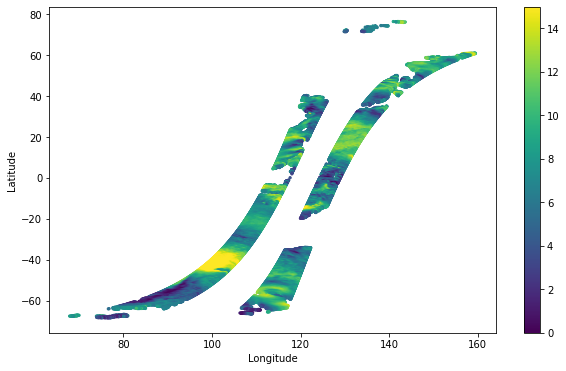

In [12]:
from matplotlib import pylab as plt
fig,ax=plt.subplots(1,1,figsize=(10,6))
plt.scatter(data['lon'],data['lat'],s=5,c=data['wind_speed'],vmin=0,vmax=15)
plt.colorbar()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

## The following is for another dataset.

In [ ]:
fns=sorted(s3.glob(podaac_s3+'/ASCATC-L2-25km/*nc'))
print(len(fns))
data1=xr.open_dataset(s3.open(fns[0]),)
data1

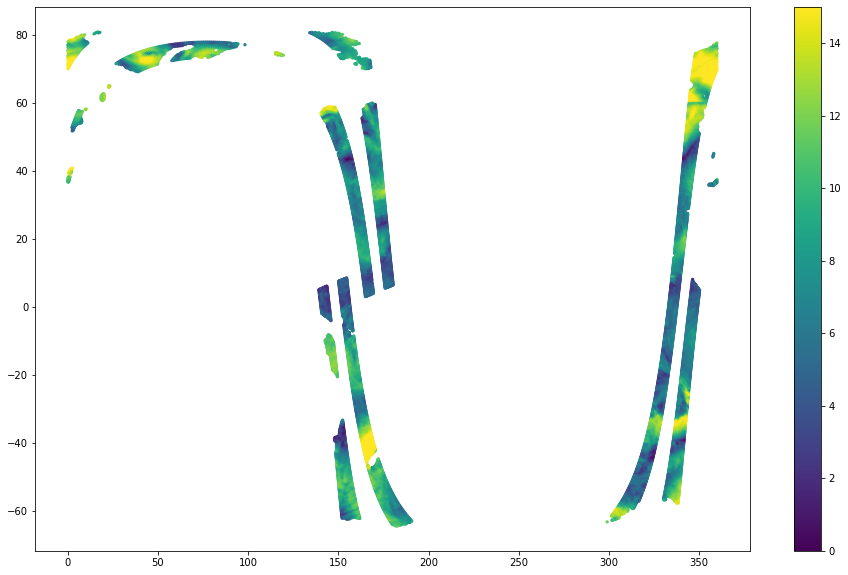

In [39]:
fig,ax=plt.subplots(1,1,figsize=(16,10))
plt.scatter(data1['lon'],data1['lat'],s=5,c=data1['wind_speed'],vmin=0,vmax=15)
plt.colorbar()